In [1]:
import os
import shutil
import random
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2


import glob
from skimage.feature import hog # for feature extraction
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from tensorflow.keras.preprocessing import image as kimage

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization, ZeroPadding2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

%matplotlib inline

C:\Users\Alexso\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\Alexso\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Alexso\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Alexso\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) o

In [2]:
covid_dir = "D:/Final/Aug/Covid/"
normal_dir = "D:/Final/Aug/Normal/"

(224, 224, 3)


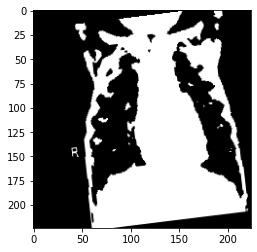

In [3]:
path = normal_dir + os.listdir(normal_dir)[10]
img = mpimg.imread(path)
print(img.shape)
plt.imshow(img, cmap='gray')

(224, 224, 3)
(224, 224, 3)


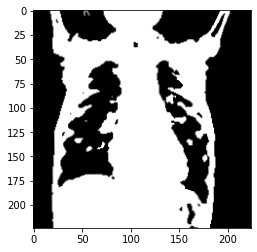

In [4]:
path = normal_dir + os.listdir(normal_dir)[0]
img = mpimg.imread(path)
plt.imshow(img, cmap='gray')
print(img.shape)
resized_img = cv2.resize(img, (224,224))
print(resized_img.shape)




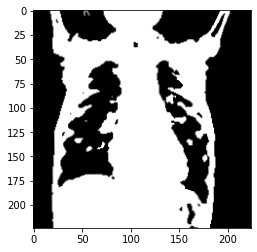

In [5]:
plt.imshow(resized_img, cmap='gray')

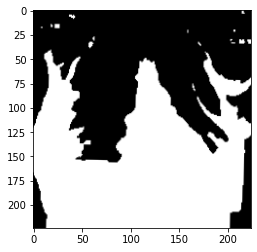

In [6]:

for image in range(len(os.listdir(covid_dir))):
    path=covid_dir+os.listdir(covid_dir)[image]
    img = mpimg.imread(path)
    plt.imshow(img, cmap='gray')

In [7]:
path = normal_dir + os.listdir(normal_dir)[0]
img = cv2.imread(path)
resized_img = cv2.resize(img, (224,224))
print(resized_img.shape)

(224, 224, 3)


In [8]:
for image in range(len(os.listdir(covid_dir))):
    path = covid_dir+os.listdir(covid_dir)[image]
    img = cv2.imread(path)
    resized_image = cv2.resize(img, (224,224))
    cv2.imwrite('Covid {}.png'.format(image), resized_image)

In [9]:
for image in range(len(os.listdir(normal_dir))):
    path = normal_dir+os.listdir(normal_dir)[image]
    img = cv2.imread(path)
    resized_image = cv2.resize(img, (224,224))
    cv2.imwrite('Normal {}.png'.format(image), resized_image)

In [13]:
os.mkdir('D:/Final/Augmentation')

In [11]:
os.getcwd()

'C:\\Users\\Alexso'

In [11]:
d = os.listdir(os.getcwd())
for i in d:
    if os.path.isdir(i):
        print(i)

.anaconda
.conda
.config
.ipynb_checkpoints
.ipython
.jupyter
.keras
.matplotlib
.spyder-py3
3D Objects
Anaconda3
AppData
Application Data
Contacts
Cookies
Desktop
Documents
Downloads
Favorites
IntelGraphicsProfiles
keras-retinanet-master
Links
Local Settings
MicrosoftEdgeBackups
Music
My Documents
NetHood
OneDrive
Pictures
PrintHood
PycharmProjects
Recent
Saved Games
Searches
SendTo
Start Menu
Templates
Videos
Zotero


In [14]:
os.mkdir('D:/Final/Augmentation/Normal')
os.mkdir('D:/Final/Augmentation/Covid')

In [15]:
for file in os.listdir(os.getcwd()):
    if file.split(' ')[0] == 'Normal':
        dest = shutil.move(file, 'D:/Final/Augmentation/Normal')
    elif file.split(' ')[0] == 'Covid':
        dest = shutil.move(file, 'D:/Final/Augmentation/Covid')
    else:
        dest = ""

# splitting data

In [4]:

root_dir = 'D:/Final/Augmentation/'
totalimages=0;
cls="Covid"
src = root_dir + cls # Folder to copy images from
covidFileNames = os.listdir(src)
print("Covid images",len(covidFileNames))
totalimages=totalimages+len(covidFileNames)

root_dir = 'D:/Final/Augmentation/'
cls="Normal"
src = root_dir + cls # Folder to copy images from
normalFileNames = os.listdir(src)
print("Normal Images",len(normalFileNames))
totalimages=totalimages+len(normalFileNames)

print("Total Images",totalimages)

Covid images 3000
Normal Images 3000
Total Images 6000


In [3]:
# # Creating Train / Val / Test folders (One time use)
 
root_dir = 'D:/Final/Augmentation/' # data root path
classes_dir = ['Covid', 'Normal'] #total labels

test_ratio = 0.20
val_ratio = 0.0

for cls in classes_dir:
    os.makedirs(root_dir +'train/' + cls)
    os.makedirs(root_dir +'valid/' + cls)
    os.makedirs(root_dir +'test/' + cls)


    
totalimage=0
testimage=0
valimage=0
trainimage=0
sys.stdout.write("Spliting")
sys.stdout.write("    ")
for cls in classes_dir:
    # Creating partitions of the data after shuffeling
    src = root_dir + cls # Folder to copy images from
    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)
    train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                      [int(len(allFileNames)* (1 - (val_ratio + test_ratio))), 
                                                       int(len(allFileNames)* (1 - test_ratio))])
    train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
    val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
    test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]
    totalimage=totalimage+len(allFileNames)
    trainimage=trainimage+len(train_FileNames)
    valimage=valimage+ len(val_FileNames)
    testimage=testimage+len(test_FileNames)
        
    # Copy-pasting images
    for name in train_FileNames:
        shutil.copy(name, root_dir +'train/' + cls)
        sys.stdout.write(".")
    for name in val_FileNames:
        shutil.copy(name, root_dir +'valid/' + cls)
        sys.stdout.write(".")
    for name in test_FileNames:
        shutil.copy(name, root_dir +'test/' + cls)
        sys.stdout.write(".")
        

print("")
print('Total images: ', totalimage)
print('Training: ',trainimage)
print('Validation: ', valimage)
print('Testing: ', testimage)

Spliting    ............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

# CNN

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
SIZE=224

C:\Users\Alexso\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Alexso\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Alexso\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Alexso\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dty

In [4]:
train_images = []
train_labels = []
for directory_path in glob.glob("D:/Final/Augmentation/train/*"):
    label = directory_path.split("\\")[-1]
   # print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        #print(img_path)
        img = cv2.imread(img_path)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)


In [5]:
# test
test_images = []
test_labels = [] 
for directory_path in glob.glob("D:/Final/Augmentation/test/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [6]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [7]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
from sklearn.model_selection import train_test_split
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [103]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train,2)
y_test_one_hot = to_categorical(y_test,2)

In [108]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (3840, 224, 224, 1)
3840 train samples
3600 test samples


In [17]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  2
Output classes :  [0 1]


In [107]:
x_train = x_train.reshape(-1, 224,224, 1)
x_test = x_test.reshape(-1, 224,224, 1)
x_train.shape, x_test.shape

((3840, 224, 224, 1), (3600, 224, 224, 1))

In [105]:
from sklearn.model_selection import train_test_split
x_train,x_valid,train_label,valid_label = train_test_split(x_train, y_train_one_hot, test_size=0.2, random_state=5)

In [109]:
x_train.shape,x_valid.shape,train_label.shape,valid_label.shape

((3840, 224, 224, 1), (960, 224, 224), (3840, 2), (960, 2))

In [10]:
SIZE=224
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', strides=2,  padding = 'same', input_shape = (SIZE, SIZE, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.3))
#model.add(BatchNormalization())

#model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.2))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.2))
#model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.15))
#model.add(BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.15))
#model.add(BatchNormalization())
model.add(Flatten())

#model.add(Dense(256, activation = 'relu'))
#model.add(Dropout(rate = 0.3))


In [3]:
#Add layers for deep learning prediction
x = model.output  
x = Dense(256, activation = 'relu')(x)
model.add(Dropout(rate = 0.3))
prediction_layer = Dense(1, activation = 'sigmoid')(x)


In [4]:
# Make a new model combining both feature extractor and x
from tensorflow import keras
from tensorflow.keras import layers
opt = keras.optimizers.Adam(learning_rate=0.001)
cnn_model = Model(inputs=model.input, outputs=prediction_layer)
cnn_model.compile(optimizer=opt, loss = 'binary_crossentropy', metrics = ['acc'])
print(cnn_model.summary()) 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 224, 224, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 112, 112, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 56, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 64)        0     

In [23]:
import datetime
start = datetime.datetime.now()
#Train the CNN model
history = cnn_model.fit(x_train, train_label, epochs=50,batch_size = 64, validation_data = (x_valid, valid_label))
end = datetime.datetime.now()

print("Total execution time is: ", end-start)


Epoch 1/50
60/60 [==============================] - 130s 2s/step - loss: 16.6483 - acc: 0.5380 - val_loss: 0.3135 - val_acc: 0.9031
Epoch 2/50
60/60 [==============================] - 105s 2s/step - loss: 0.2494 - acc: 0.9106 - val_loss: 0.2239 - val_acc: 0.9208
Epoch 3/50
60/60 [==============================] - 110s 2s/step - loss: 0.1705 - acc: 0.9468 - val_loss: 0.1448 - val_acc: 0.9490
Epoch 4/50
60/60 [==============================] - 111s 2s/step - loss: 0.1203 - acc: 0.9598 - val_loss: 0.1363 - val_acc: 0.9510
Epoch 5/50
60/60 [==============================] - 111s 2s/step - loss: 0.1134 - acc: 0.9644 - val_loss: 0.1537 - val_acc: 0.9521
Epoch 6/50
60/60 [==============================] - 101s 2s/step - loss: 0.1054 - acc: 0.9690 - val_loss: 0.0994 - val_acc: 0.9719
Epoch 7/50
60/60 [==============================] - 112s 2s/step - loss: 0.0942 - acc: 0.9737 - val_loss: 0.1067 - val_acc: 0.9646
Epoch 8/50
60/60 [==============================] - 105s 2s/step - loss: 0.0844 - 

In [90]:
model.save("Covid19_best_model.h5")

In [24]:
#test_eval = feature_extractor.evaluate(x_test, y_test_one_hot, verbose=1)
score = cnn_model.evaluate(x_test, y_test_one_hot, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

38/38 [==============================] - 13s 253ms/step - loss: 0.0641 - acc: 0.9833
Test loss: 0.06407415121793747
Test accuracy: 0.9833333492279053


In [93]:
#Validation Test
score = cnn_model.evaluate(x_valid, valid_label, verbose=1)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

30/30 [==============================] - 7s 221ms/step - loss: 0.0462 - acc: 0.9844
Validation loss: 0.0462464801967144
Validation accuracy: 0.984375


In [26]:
#test_eval = feature_extractor.evaluate(x_test, y_test_one_hot, verbose=1)
score = cnn_model.evaluate(x_train, train_label, verbose=1)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

120/120 [==============================] - 28s 231ms/step - loss: 0.0044 - acc: 0.9995
Train loss: 0.004370497073978186
Train accuracy: 0.9994791746139526


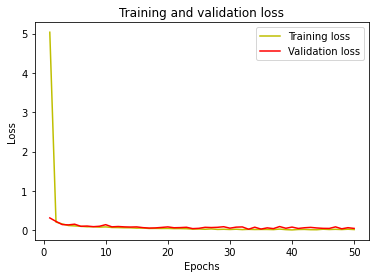

In [28]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

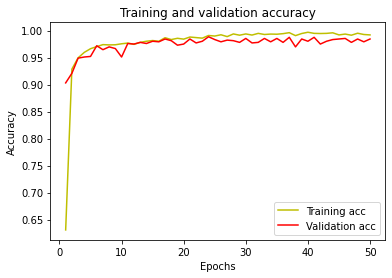

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

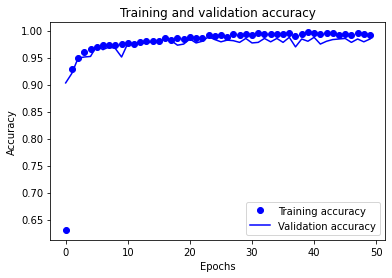

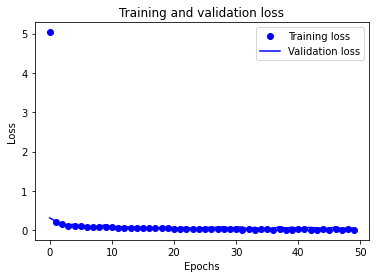

In [27]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
prediction_NN = cnn_model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

[[587  13]
 [  7 593]]


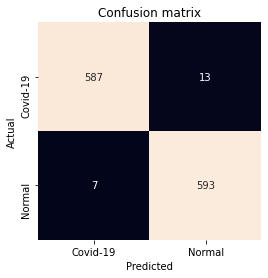

In [31]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
classes = ['Covid-19', 'Normal']
plt.figure(figsize=(4,4))
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
plt.title('Confusion matrix')
#sns.heatmap(cm, annot=True)
#sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=classes, fmt='d', annot=True, cmap=plt.cm.Blues)
sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=classes, fmt='d', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [32]:
from sklearn.metrics import classification_report
#target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_labels, prediction_NN, target_names=['Covid (Class 0)','Normal (Class 1)']))

                  precision    recall  f1-score   support

 Covid (Class 0)       0.99      0.98      0.98       600
Normal (Class 1)       0.98      0.99      0.98       600

       micro avg       0.98      0.98      0.98      1200
       macro avg       0.98      0.98      0.98      1200
    weighted avg       0.98      0.98      0.98      1200



In [33]:
predicted_classes = cnn_model.predict(x_test)

In [34]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, y_test.shape

((1200,), (1200,))

Found 1180 correct labels


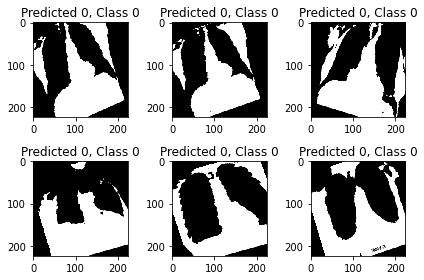

In [35]:
correct = np.where(predicted_classes==y_test)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:6]):
    plt.subplot(2,3,i+1)
    plt.imshow(x_test[correct], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()

Found 20 incorrect labels


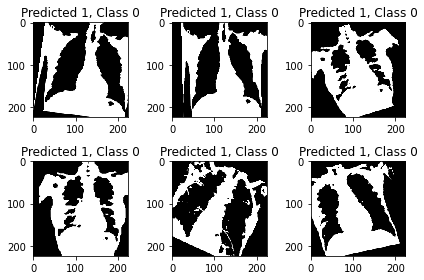

In [36]:
incorrect = np.where(predicted_classes!=y_test)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:6]):
    plt.subplot(2,3,i+1)
    plt.imshow(x_test[incorrect], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.tight_layout()

The prediction for this image is:  ['Covid']
The actual label for this image is:  Covid


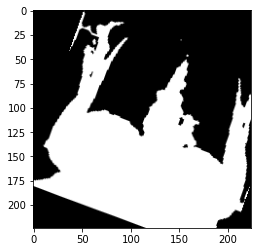

In [67]:
#Check results on a few select images
n=55  #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction = np.argmax(cnn_model.predict(input_img))  #argmax to convert categorical back to original
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

In [56]:
#Now, let us use features from convolutional network for RF
X_for_RF = model.predict(x_train) #This is out X input to RF

# RANDOM FOREST

In [57]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [58]:
# Train the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [59]:
#Send test data through same feature extractor process
X_test_feature = model.predict(x_test)
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_feature)
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

In [60]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))


Accuracy =  0.9833333333333333


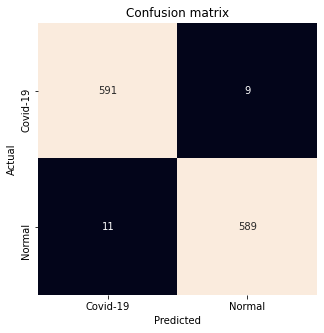

In [61]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
classes = ['Covid-19', 'Normal']
plt.figure(figsize=(5,5))
cm = confusion_matrix(test_labels, prediction_RF)
plt.title('Confusion matrix')
#sns.heatmap(cm, annot=True)
#sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=classes, fmt='d', annot=True, cmap=plt.cm.Blues)
sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=classes, fmt='d', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [62]:
from sklearn.metrics import classification_report
#target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_labels, prediction_RF, target_names=['Covid (Class 0)','Normal (Class 1)']))

                  precision    recall  f1-score   support

 Covid (Class 0)       0.98      0.98      0.98       600
Normal (Class 1)       0.98      0.98      0.98       600

       micro avg       0.98      0.98      0.98      1200
       macro avg       0.98      0.98      0.98      1200
    weighted avg       0.98      0.98      0.98      1200



The prediction for this image is:  ['Covid']
The actual label for this image is:  Covid


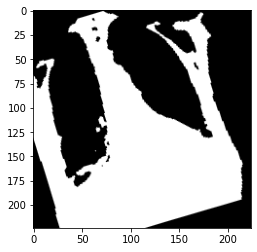

In [63]:
#Check results on a few select images
#n=125 #dog park. RF works better than CNN
n=35 #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=model.predict(input_img)
prediction_RF = RF_model.predict(input_img_features)[0] 
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])


# SVM with CNN

# 1. Linear SVM

In [68]:
from sklearn.svm import SVR, SVC
from sklearn.svm import LinearSVC
svclassifier = SVC(kernel='linear', degree=8)
#model = LinearSVC(max_iter=100)  #Default of 100 is not converging

In [69]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear', degree=8)
svclassifier.fit(X_for_RF, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [70]:
prediction_SVC = svclassifier.predict(X_test_feature)
prediction_SVC = le.inverse_transform(prediction_SVC)

In [71]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_SVC))


Accuracy =  0.9816666666666667


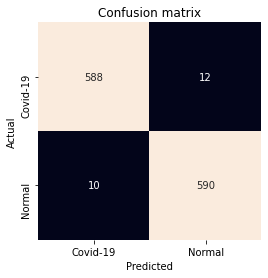

In [72]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
classes = ['Covid-19', 'Normal']
plt.figure(figsize=(4,4))
cm = confusion_matrix(test_labels, prediction_SVC)
plt.title('Confusion matrix')
#sns.heatmap(cm, annot=True)
#sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=classes, fmt='d', annot=True, cmap=plt.cm.Blues)
sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=classes, fmt='d', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [73]:
from sklearn.metrics import classification_report
#target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_labels, prediction_SVC, target_names=['Covid (Class 0)','Normal (Class 1)']))

                  precision    recall  f1-score   support

 Covid (Class 0)       0.98      0.98      0.98       600
Normal (Class 1)       0.98      0.98      0.98       600

       micro avg       0.98      0.98      0.98      1200
       macro avg       0.98      0.98      0.98      1200
    weighted avg       0.98      0.98      0.98      1200



# 2. Gaussian Kernel- rbf

In [74]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', degree=8)
svclassifier.fit(X_for_RF, y_train)

C:\Users\Alexso\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [75]:
prediction_SVC = svclassifier.predict(X_test_feature)
prediction_SVC = le.inverse_transform(prediction_SVC)

In [76]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_SVC))


Accuracy =  0.985


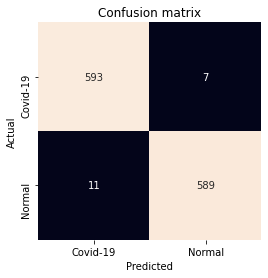

In [77]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
classes = ['Covid-19', 'Normal']
plt.figure(figsize=(4,4))
cm = confusion_matrix(test_labels, prediction_SVC)
plt.title('Confusion matrix')
#sns.heatmap(cm, annot=True)
#sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=classes, fmt='d', annot=True, cmap=plt.cm.Blues)
sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=classes, fmt='d', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [78]:
from sklearn.metrics import classification_report
#target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_labels, prediction_SVC, target_names=['Covid (Class 0)','Normal (Class 1)']))

                  precision    recall  f1-score   support

 Covid (Class 0)       0.98      0.99      0.99       600
Normal (Class 1)       0.99      0.98      0.98       600

       micro avg       0.98      0.98      0.98      1200
       macro avg       0.99      0.98      0.98      1200
    weighted avg       0.99      0.98      0.98      1200



# 3. Polynomial Kernel SVM

In [79]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_for_RF, y_train)

C:\Users\Alexso\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [80]:
prediction_SVC = svclassifier.predict(X_test_feature)
prediction_SVC = le.inverse_transform(prediction_SVC)

In [81]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_SVC))


Accuracy =  0.9775


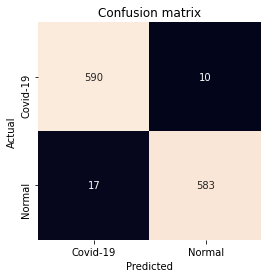

In [82]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
classes = ['Covid-19', 'Normal']
plt.figure(figsize=(4,4))
cm = confusion_matrix(test_labels, prediction_SVC)
plt.title('Confusion matrix')
#sns.heatmap(cm, annot=True)
#sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=classes, fmt='d', annot=True, cmap=plt.cm.Blues)
sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=classes, fmt='d', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [83]:
from sklearn.metrics import classification_report
#target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_labels, prediction_SVC, target_names=['Covid (Class 0)','Normal (Class 1)']))

                  precision    recall  f1-score   support

 Covid (Class 0)       0.97      0.98      0.98       600
Normal (Class 1)       0.98      0.97      0.98       600

       micro avg       0.98      0.98      0.98      1200
       macro avg       0.98      0.98      0.98      1200
    weighted avg       0.98      0.98      0.98      1200



# 4. Sigmoid

In [84]:
from sklearn.svm import SVC
svcmodel = SVC(kernel='sigmoid', degree=8)
svcmodel.fit(X_for_RF, y_train)

C:\Users\Alexso\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [85]:
prediction_SVC = svcmodel.predict(X_test_feature)
prediction_SVC = le.inverse_transform(prediction_SVC)
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_SVC))


Accuracy =  0.9683333333333334


[[565  35]
 [  3 597]]


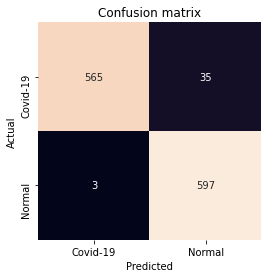

In [86]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
classes = ['Covid-19', 'Normal']
plt.figure(figsize=(4,4))
cm = confusion_matrix(test_labels, prediction_SVC)
print(cm)
plt.title('Confusion matrix')
#sns.heatmap(cm, annot=True)
#sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=classes, fmt='d', annot=True, cmap=plt.cm.Blues)
sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=classes, fmt='d', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [87]:
from sklearn.metrics import classification_report
#target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_labels, prediction_SVC, target_names=['Covid (Class 0)','Normal (Class 1)']))

                  precision    recall  f1-score   support

 Covid (Class 0)       0.99      0.94      0.97       600
Normal (Class 1)       0.94      0.99      0.97       600

       micro avg       0.97      0.97      0.97      1200
       macro avg       0.97      0.97      0.97      1200
    weighted avg       0.97      0.97      0.97      1200



In [ ]:
# Quality of the images

In [89]:
import imquality.brisque as brisque
from skimage import io, img_as_float
# img0 = img_as_float(cv2.imread('v_data/resized/vald/normal/Normal 618.jpeg', 0))
img0 = img_as_float(io.imread("D:/Final/Augmentation/test/Covid/Covid (2).png", as_gray=True))
img1 = img_as_float(io.imread("D:/Final/Augmentation/test/Covid/Covid (23).png", as_gray=True))


score0 = brisque.score(img0)
score1 = brisque.score(img1)

print("BRISQUE Score for 0 blur = ", score0)
print("BRISQUE Score for 1 blur = ", score1)

C:\Users\Alexso\Anaconda3\lib\site-packages\imquality\brisque.py:45: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)
C:\Users\Alexso\Anaconda3\lib\site-packages\imquality\brisque.py:45: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  self.image = skimage.color.rgb2gray(self.image)
C:\Users\Alexso\Anaconda3\lib\site-packages\imquality\brisque.py:45: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them un

BRISQUE Score for 0 blur =  98.71446619366381
BRISQUE Score for 1 blur =  92.08834061073028


# HOG

Number of data:
Covid-19: 3000
Normal: 3000
Validation Accuracy of SVM Algorithm: 98.33%
Test Accuracy of SVM Classifier: 98.50%
Train Accuracy of SVM Classifier: 100.00%
              precision    recall  f1-score   support

    Covid-19       0.99      0.98      0.99       613
      Normal       0.98      0.99      0.98       587

   micro avg       0.98      0.98      0.98      1200
   macro avg       0.98      0.99      0.98      1200
weighted avg       0.99      0.98      0.99      1200



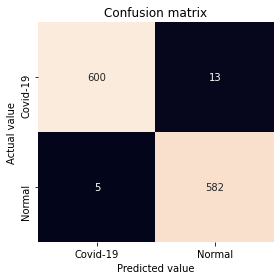

In [4]:
#cnn-svm clasfication
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import roc_curve
from sklearn.svm import SVC
import seaborn as sns
import itertools
#from yellowbrick.classifier import ClassificationReport
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
df = pd.read_csv('D:/Final/Excell/HOG_with_Aug.csv')
dataset=df.astype(float)
X = dataset.drop('target',axis=1)
y = dataset['target']
y1= dataset.iloc[:,-1:].values
Covid = y1[y1[:,0]== 0]
Covid = len(Covid)
Normal= y1[y1[:,0]==1]
Normal = len(Normal)
print("Number of data:"+"\nCovid-19: "+str(Covid)+"\nNormal: "+str(Normal))
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=42)
x_train, x_v, y_train, y_v = train_test_split(x_train,  y_train, test_size = 0.25,random_state=42)
#print('Training data Size   : ', x_train.shape)
#print('Test data Size       : ', x_test.shape)
#print('validation data Size       : ', x_v.shape)
#pca for dimension reduction 

#classification_rbf=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,decision_function_shape='ovr', degree=2, gamma=0.001, kernel='rbf',max_iter=-1, probability=False, random_state=4, shrinking=True,tol=0.001, verbose=False)
classification_rbf =SVC(C=1, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=2, gamma='auto', kernel='linear',max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)
classification_rbf.fit(x_train , y_train)
#classification_rbf.fit(x_train , y_train)
predicts_rbf = classification_rbf.predict(x_test)
#cross validation to show te validity of the dataset
#scores = cross_val_score(classification_rbf, X, y, cv=10, scoring='accuracy')
#print(scores)
#print(scores.mean())
#CONFUSION MATRIX - RBF SVM
#print("Accuracy: "+str( (cm_rbf[0][0]+cm_rbf[1][1]) / (sum(cm_rbf[0])+sum(cm_rbf[1])) ) )
print("Validation Accuracy of SVM Algorithm: {:.2f}%".format(classification_rbf.score(x_v,y_v)*100))
print("Test Accuracy of SVM Classifier: {:.2f}%".format(classification_rbf.score(x_test,y_test)*100))
print("Train Accuracy of SVM Classifier: {:.2f}%".format(classification_rbf.score(x_train,y_train)*100))
target_names = ['Covid-19', 'Normal']
titles_options = [("confusion matrix", 'true')]
classes = ['Covid-19', 'Normal']
plt.figure(figsize=(4,4))
print(classification_report(y_test, predicts_rbf, target_names=target_names))
titles_options = [("confusion matrix", 'true')]
cm = confusion_matrix(y_test, predicts_rbf)
plt.title('Confusion matrix')

sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=classes, fmt='d', annot=True)
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
plt.tight_layout()

# RF

Number of data:
Covid-19: 3000
Normal: 3000


C:\Users\Alexso\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:487: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\Alexso\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cu

C:\Users\Alexso\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Alexso\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check th

C:\Users\Alexso\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Alexso\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check th

C:\Users\Alexso\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Alexso\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check th

va Accuracy of SVM Algorithm: 96.42%
Test Accuracy of Random Forest Classifier: 97.50%
Train Accuracy of Random Forest Classifier: 100.00%
              precision    recall  f1-score   support

    Covid-19       0.97      0.98      0.98       613
      Normal       0.98      0.97      0.97       587

   micro avg       0.97      0.97      0.97      1200
   macro avg       0.98      0.97      0.97      1200
weighted avg       0.98      0.97      0.97      1200



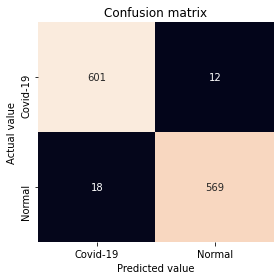

In [5]:
#cnn-svm clasfication
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import roc_curve
from sklearn.svm import SVC
import seaborn as sns
import itertools
#from yellowbrick.classifier import ClassificationReport
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
df = pd.read_csv('D:/Final/Excell/HOG_with_Aug.csv')
dataset=df.astype(float)
X = dataset.drop('target',axis=1)
y = dataset['target']
y1= dataset.iloc[:,-1:].values
Covid = y1[y1[:,0]== 0]
Covid = len(Covid)
Normal= y1[y1[:,0]==1]
Normal = len(Normal)
print("Number of data:"+"\nCovid-19: "+str(Covid)+"\nNormal: "+str(Normal))
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=42)
x_train, x_v, y_train, y_v = train_test_split(x_train,  y_train, test_size = 0.25,random_state=42)
#print('Training data Size   : ', x_train.shape)
#print('Test data Size       : ', x_test.shape)
#print('validation data Size       : ', x_v.shape)
#pca for dimension reduction 

#classification_rbf=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,decision_function_shape='ovr', degree=2, gamma=0.001, kernel='rbf',max_iter=-1, probability=False, random_state=4, shrinking=True,tol=0.001, verbose=False)
#classification_rbf =SVC(C=1, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=2, gamma='auto', kernel='linear',max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)
from sklearn.ensemble import RandomForestClassifier
classification_rbf = RandomForestClassifier(n_estimators = 50, random_state = 42)
classification_rbf.fit(x_train , y_train)
#classification_rbf.fit(x_train , y_train)
predicts_rbf = classification_rbf.predict(x_test)
#cross validation to show te validity of the dataset
#scores = cross_val_score(classification_rbf, X, y, cv=10, scoring='accuracy')
#print(scores)
#print(scores.mean())
#CONFUSION MATRIX - RBF SVM
#print("Accuracy: "+str( (cm_rbf[0][0]+cm_rbf[1][1]) / (sum(cm_rbf[0])+sum(cm_rbf[1])) ) )
print("va Accuracy of SVM Algorithm: {:.2f}%".format(classification_rbf.score(x_v,y_v)*100))
print("Test Accuracy of Random Forest Classifier: {:.2f}%".format(classification_rbf.score(x_test,y_test)*100))
print("Train Accuracy of Random Forest Classifier: {:.2f}%".format(classification_rbf.score(x_train,y_train)*100))
target_names = ['Covid-19', 'Normal']
titles_options = [("confusion matrix", 'true')]
classes = ['Covid-19', 'Normal']
plt.figure(figsize=(4,4))
print(classification_report(y_test, predicts_rbf, target_names=target_names))
titles_options = [("confusion matrix", 'true')]
cm = confusion_matrix(y_test, predicts_rbf)
plt.title('Confusion matrix')

sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=classes, fmt='d', annot=True)
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
plt.tight_layout()

In [6]:
print(classification_report(y_test, predicts_rbf, target_names=target_names))

              precision    recall  f1-score   support

    Covid-19       0.97      0.98      0.98       613
      Normal       0.98      0.97      0.97       587

   micro avg       0.97      0.97      0.97      1200
   macro avg       0.98      0.97      0.97      1200
weighted avg       0.98      0.97      0.97      1200



# Combined Feature Extraction

C:\Users\Alexso\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\Alexso\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=T

Number of data
Covid-19: 3000
Normal: 3000
Validation Accuracy of SVM Algorithm: 99.58%
Test Accuracy of SVM Classifier: 99.67%
Train Accuracy of SVM Classifier: 99.97%
              precision    recall  f1-score   support

    Covid-19       1.00      0.99      1.00       613
      Normal       0.99      1.00      1.00       587

   micro avg       1.00      1.00      1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



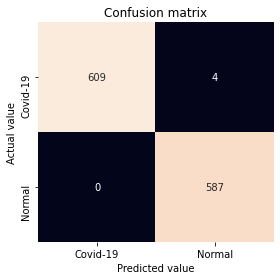

In [1]:
#cnn-svm clasfication
import numpy as np
import pandas as pd
from numpy import nan
from pandas import DataFrame
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import roc_curve
from sklearn.svm import SVC
import seaborn as sns
import itertools
#from yellowbrick.classifier import ClassificationReport
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
#from sklearn.model_selection import tExcellrain_test_split
from sklearn.model_selection import train_test_split
df = pd.read_csv('D:/Final/Excell/Excell/Combined_CNN_HOG_New.csv')
dataset=df.astype(float)

X = dataset.drop('target',axis=1)
y = dataset['target']
y1= dataset.iloc[:,-1:].values
Covid = y1[y1[:,0]== 0]
Covid = len(Covid)
Normal= y1[y1[:,0]==1]
Normal = len(Normal)
print("Number of data"+"\nCovid-19: "+str(Covid)+"\nNormal: "+str(Normal))
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=42)
x_train, x_v, y_train, y_v = train_test_split(x_train,  y_train, test_size = 0.20,random_state=42)
#print('Training data Size   : ', x_train.shape)
#print('Test data Size       : ', x_test.shape)
#print('validation data Size       : ', x_v.shape)
#pca for dimension reduction 

#classification_rbf=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,decision_function_shape='ovr', degree=2, gamma=0.001, kernel='rbf',max_iter=-1, probability=False, random_state=4, shrinking=True,tol=0.001, verbose=False)
classification_rbf =SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=8, gamma='auto', kernel='linear',max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001, verbose=False)
#x_train = x_train.fillna(x_train.mean())
#y_train = y_train.fillna(y_train.mean())
classification_rbf.fit(x_train, y_train)

#np.isnan(y_train)  
#classification_rbf.fit(x_train , y_train)
predicts_rbf = classification_rbf.predict(x_test)
print("Validation Accuracy of SVM Algorithm: {:.2f}%".format(classification_rbf.score(x_v,y_v)*100))
print("Test Accuracy of SVM Classifier: {:.2f}%".format(classification_rbf.score(x_test,y_test)*100))
print("Train Accuracy of SVM Classifier: {:.2f}%".format(classification_rbf.score(x_train,y_train)*100))
target_names = ['Covid-19', 'Normal']
titles_options = [("confusion matrix", 'true')]
classes = ['Covid-19', 'Normal']
plt.figure(figsize=(4,4))
print(classification_report(y_test, predicts_rbf, target_names=target_names))
titles_options = [("confusion matrix", 'true')]
cm = confusion_matrix(y_test, predicts_rbf)
plt.title('Confusion matrix')

sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=target_names, fmt='d', annot=True)
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
plt.tight_layout()

# RF

Number of data:
Covid-19: 3000
Normal: 3000
Training data Size   :  (3840, 4036)
Test data Size       :  (1200, 4036)
validation data Size       :  (960, 4036)


C:\Users\Alexso\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\Users\Alexso\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict

C:\Users\Alexso\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Alexso\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check th

C:\Users\Alexso\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Alexso\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check th

C:\Users\Alexso\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Alexso\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check th

C:\Users\Alexso\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Alexso\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check th

C:\Users\Alexso\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Alexso\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check th

C:\Users\Alexso\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\Alexso\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link fo

Validation Accuracy of  Random Forest Classifier: 98.54%
Test Accuracy of  Random Forest Classifier: 98.67%
Train Accuracy of  Random Forest Classifier: 100.00%
              precision    recall  f1-score   support

    Covid-19       0.99      0.99      0.99       613
      Normal       0.99      0.98      0.99       587

   micro avg       0.99      0.99      0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



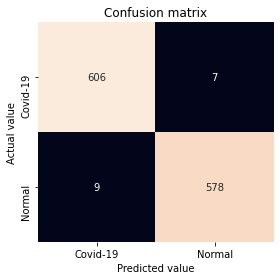

In [2]:
#cnn-svm clasfication
import numpy as np
import pandas as pd
from numpy import nan
from pandas import DataFrame
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import roc_curve
from sklearn.svm import SVC
import seaborn as sns
import itertools
#from yellowbrick.classifier import ClassificationReport
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
df = pd.read_csv('D:/Final/Excell/Excell/Combined_CNN_HOG_New.csv')
dataset=df.astype(float)

X = dataset.drop('target',axis=1)
y = dataset['target']
y1= dataset.iloc[:,-1:].values
Covid = y1[y1[:,0]== 0]
Covid = len(Covid)
Normal= y1[y1[:,0]==1]
Normal = len(Normal)
print("Number of data:"+"\nCovid-19: "+str(Covid)+"\nNormal: "+str(Normal))
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=42)
x_train, x_v, y_train, y_v = train_test_split(x_train,  y_train, test_size = 0.20,random_state=42)
print('Training data Size   : ', x_train.shape)
print('Test data Size       : ', x_test.shape)
print('validation data Size       : ', x_v.shape)


from sklearn.ensemble import RandomForestClassifier
classification_rbf = RandomForestClassifier(n_estimators = 80, random_state = 42)
#classification_rbf=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,decision_function_shape='ovr', degree=2, gamma=0.001, kernel='rbf',max_iter=-1, probability=False, random_state=4, shrinking=True,tol=0.001, verbose=False)
#classification_rbf =SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=8, gamma='auto', kernel='linear',max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001, verbose=False)
#x_train = x_train.fillna(x_train.mean())
#y_train = y_train.fillna(y_train.mean())
classification_rbf.fit(x_train, y_train)

#np.isnan(y_train)  
#classification_rbf.fit(x_train , y_train)
predicts_rbf = classification_rbf.predict(x_test)
print("Validation Accuracy of  Random Forest Classifier: {:.2f}%".format(classification_rbf.score(x_v,y_v)*100))
print("Test Accuracy of  Random Forest Classifier: {:.2f}%".format(classification_rbf.score(x_test,y_test)*100))
print("Train Accuracy of  Random Forest Classifier: {:.2f}%".format(classification_rbf.score(x_train,y_train)*100))
target_names = ['Covid-19', 'Normal']
titles_options = [("confusion matrix", 'true')]
classes = ['Covid-19', 'Normal']
plt.figure(figsize=(4,4))
print(classification_report(y_test, predicts_rbf, target_names=target_names))
titles_options = [("confusion matrix", 'true')]
cm = confusion_matrix(y_test, predicts_rbf)
plt.title('Confusion matrix')

sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=target_names, fmt='d', annot=True)
plt.ylabel('Actual value')
plt.xlabel('Predicted value')
plt.tight_layout()

In [3]:
print(classification_report(y_test, predicts_rbf, target_names=target_names))

              precision    recall  f1-score   support

    Covid-19       0.99      0.99      0.99       613
      Normal       0.99      0.98      0.99       587

   micro avg       0.99      0.99      0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200

